In [7]:
#!pip install torch torchvision
#!pip install tensorflow

In [8]:
# ========================
# MNIST — Manual Load
# ========================

# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # just to load the data as raw NumPy arrays

In [9]:
# Step 2: Load raw MNIST data (60k train, 10k test)
# This returns NumPy arrays: X_train, y_train, X_test, y_test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
# Step 3: Explore data shapes
print("Training data shape:", X_train.shape)   
print("Training labels shape:", y_train.shape) 
print("Test data shape:", X_test.shape)       

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)


In [11]:
# Step 4: Inspect a single image (raw values)
index = 10  # Change this index to view different images
print("Label:", y_train[index])
print("Pixel values:\n", X_train[index])  # Each pixel is a value between 0 and 255

Label: 3
Pixel values:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   

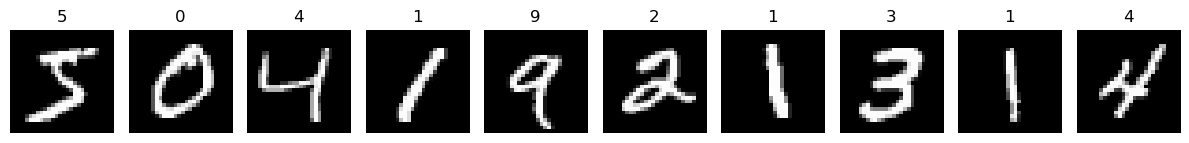

In [12]:
# Step 5: Display some digits
def show_digits(images, labels, n=10):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"{labels[i]}")
        plt.axis('off') 
    plt.tight_layout()
    plt.show()

show_digits(X_train, y_train, n=10)